In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
from tqdm import tqdm
import psix
from matplotlib.gridspec import GridSpec

from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

cm = 1/2.54

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests


def run_kw(exon_psi, labels):
    kw_input = []
    for l in labels:
        kw_input.append(list(exon_psi[l]))
        
    if len(labels) == 2:
        return kruskal(kw_input[0], kw_input[1], nan_policy='omit')
    if len(labels) == 3:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], nan_policy='omit')
    if len(labels) == 4:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], nan_policy='omit')
    if len(labels) == 5:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], nan_policy='omit')
    if len(labels) == 6:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], nan_policy='omit')
    if len(labels) == 7:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], kw_input[6], nan_policy='omit')
    if len(labels) == 8:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], kw_input[6], kw_input[7], nan_policy='omit')
    
def run_kw_dset(psi_table, labels, exon_list):
    kw_output = pd.DataFrame()
    kw_score = []
    pvals = []
    for exon in tqdm(exon_list, position=0, leave=True):
        score, p = run_kw(psi_table.loc[exon], labels)
        kw_score.append(score)
        pvals.append(p)
    kw_output['KW_score'] = kw_score
    kw_output['pvals'] = pvals
    kw_output['qvals'] = multipletests(pvals, method='fdr_bh')[1]
    kw_output.index = exon_list
    return kw_output



In [3]:
psix_three_lineage_1 = psix.Psix()
psix_three_lineage_1.junctions2psi(
        'processed_tables/splice_junction_counts_0.1.tab.gz',
        '',
        'processed_tables/tpm_0.1.tab.gz',
        save_files_in='psix_output/psix_object_0.1/')

psix_three_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100)

psix_results_1 = psix_three_lineage_1.psix_results


# psix_three_lineage_05 = psix.Psix()
# psix_three_lineage_05.junctions2psi(
#         'processed_tables/splice_junction_counts_0.05.tab.gz',
#         '',
#         'processed_tables/tpm_0.05.tab.gz',
#         save_files_in='psix_output/psix_object_0.05/')

# psix_three_lineage_05.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=100)

# psix_results_05 = psix_three_lineage_05.psix_results



# psix_three_lineage_01 = psix.Psix()
# psix_three_lineage_01.junctions2psi(
#         'processed_tables/splice_junction_counts_0.01.tab.gz',
#         '',
#         'processed_tables/tpm_0.01.tab.gz',
#         save_files_in='psix_output/psix_object_0.01/')

# psix_three_lineage_01.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=100)

# psix_results_01 = psix_three_lineage_01.psix_results



Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 1000/1000 [00:20<00:00, 49.92it/s]


Successfully processed RNA-seq data
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 3424.13it/s]

Successfully computed cell-cell metric
Computing Psix score in 3354 exons



100%|██████████| 3354/3354 [00:33<00:00, 100.83it/s] 

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 25/25 [08:39<00:00, 20.79s/it]  


Successfully estimated p-values


In [4]:
# psix_three_lineage_1 = psix.Psix()
# psix_three_lineage_1.process_rnaseq(
#         'processed_tables/SE_counts_0.1.tab.gz',
#         'processed_tables/constitutive_introns_0.1.tab.gz',
#         'processed_tables/tpm_0.1.tab.gz',
#         minJR = 1,
#         minCell=1,
#         min_observed = 0.25)

# # psix_object = psix.Psix()
# # psix_object.junctions2psi(
# #         '/mnt/lareaulab/cfbuenabadn/RNASeq/Mouse/Tiklova/SJ_tables/midbrain_neurons/',
# #         '/mnt/lareaulab/cfbuenabadn/Genomes/pipeline_files/mm10_introns.tab',
# #         '/mnt/lareaulab/cfbuenabadn/RNASeq/Mouse/Tiklova/tpm.tab.gz',
# #         save_files_in='psix_output/'
# #     )

# psix_three_lineage_1.compute_psix_scores(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25, 
#                                 n_random_exons=2000, n_neighbors=100)

# psix_three_lineage_05 = psix.Psix()
# psix_three_lineage_05.process_rnaseq(
#         'processed_tables/SE_counts_0.05.tab.gz',
#         'processed_tables/constitutive_introns_0.05.tab.gz',
#         'processed_tables/tpm_0.05.tab.gz',
#         minJR = 1,
#         minCell=1,
#         min_observed = 0.25)

# psix_three_lineage_05.compute_psix_scores(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25, 
#                                 n_random_exons=2000, n_neighbors=100)

# psix_three_lineage_01 = psix.Psix()
# psix_three_lineage_01.process_rnaseq(
#         'processed_tables/SE_counts_0.01.tab.gz',
#         'processed_tables/constitutive_introns_0.01.tab.gz',
#         'processed_tables/tpm_0.01.tab.gz',
#         minJR = 1,
#         minCell=1,
#         min_observed = 0.25)

# psix_three_lineage_01.compute_psix_scores(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25, 
#                                 n_random_exons=2000, n_neighbors=100)


meta = pd.read_csv('sim_output/meta.tab.gz', sep='\t')
meta.index=['cell_'+str(i+1) for i in range(1000)]

#pop_1 = meta.loc[meta['pop'] == '4_1'].index
#pop_2 = meta.loc[meta['pop'] == '4_5'].index
#pop_3 = meta.loc[meta['pop'] == '5_2'].index
#pop_4 = meta.loc[meta['pop'] == '5_3'].index
#labels = [pop_1, pop_2, pop_3, pop_4]

pop_1 = meta.loc[meta['pop'] == '4_1'].index
pop_2 = meta.loc[meta['pop'] == '4_5'].index
pop_2 = pop_2 | meta.loc[meta['pop'] == '5_2'].index
pop_3 = meta.loc[meta['pop'] == '5_3'].index
labels = [pop_1, pop_2, pop_3]

kw_1 = run_kw_dset(psix_three_lineage_1.adata.uns['psi'][psix_three_lineage_1.psix_results.index].T, 
                         labels, psix_three_lineage_1.psix_results.index)

# kw_05 = run_kw_dset(psix_three_lineage_05.adata.uns['psi'][psix_three_lineage_05.psix_results.index].T, 
#                          labels, psix_three_lineage_05.psix_results.index)

# kw_01 = run_kw_dset(psix_three_lineage_01.adata.uns['psi'][psix_three_lineage_01.psix_results.index].T, 
#                          labels, psix_three_lineage_01.psix_results.index)

l1 = []
with open('sim_output/l1_diff.txt', 'r') as l1_file:
    for i in l1_file:
        l1.append(int(i.rstrip()))
        
l2 = []
with open('sim_output/l2_diff.txt', 'r') as l2_file:
    for i in l2_file:
        l2.append(int(i.rstrip()))
        
l3 = []
with open('sim_output/l3_diff.txt', 'r') as l3_file:
    for i in l3_file:
        l3.append(int(i.rstrip()))
        
l1 = np.array(l1)
l2 = np.array(l2)
l3 = np.array(l3)

ds = ((l1 + l2 + l3)>0).astype(int)

gearyc_1 = pd.read_csv('gearyc/gearyc_0.1.tab.gz', sep='\t', index_col=0)
# gearyc_05 = pd.read_csv('gearyc/gearyc_0.05.tab.gz', sep='\t', index_col=0)
# gearyc_01 = pd.read_csv('gearyc/gearyc_0.01.tab.gz', sep='\t', index_col=0)

100%|██████████| 3354/3354 [00:26<00:00, 128.10it/s]


In [24]:
ds[:30]

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1])

In [5]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

platonic_psi = pd.read_csv('sim_output/psi_platonic.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)




def get_random_samples(psix_results, kw, gearyc):
    
    pos = []
    neg = []
    for i in range(5000):
        if ('gene'+str(i+1)) in psix_results.index:

            if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
                pos.append('gene'+str(i+1))
            else:
            #elif ds[i] == 0:
                neg.append('gene'+str(i+1))
                
    psix_auc = []
    kw_auc = []
    gearyc_auc = []

    for i in tqdm(range(200)):

        pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
        neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)

        labels = [1]*len(pos_sample) + [0]*len(neg_sample)
        order = list(pos_sample) + list(neg_sample)


        y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])


        pre, rec, thres = precision_recall_curve(y_, psix_results.loc[order].psix_score)
        pre_kw, rec_kw, thres_kw = precision_recall_curve(y_, kw.loc[order].KW_score)
        pre_c, rec_c, thres_c = precision_recall_curve(y_, gearyc.loc[order].C_score)

        psix_auc.append(auc(rec, pre))
        kw_auc.append(auc(rec_kw, pre_kw))
        gearyc_auc.append(auc(rec_c, pre_c))
        
    return psix_auc, kw_auc, gearyc_auc

In [6]:
psix_1_auc, kw_1_auc, gearyc_1_auc = get_random_samples(psix_results_1, kw_1, gearyc_1)
psix_05_auc, kw_05_auc, gearyc_05_auc = get_random_samples(psix_results_05, kw_05, gearyc_05)
psix_01_auc, kw_01_auc, gearyc_01_auc = get_random_samples(psix_results_01, kw_01, gearyc_01)

100%|██████████| 200/200 [00:06<00:00, 32.00it/s]


NameError: name 'psix_results_05' is not defined

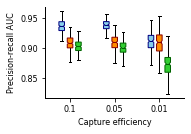

In [29]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
# gs = GridSpec(1,7)
# gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(111)
# ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_1_auc, psix_05_auc, psix_01_auc], positions=[1,5,9], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_1_auc, kw_05_auc, kw_01_auc], positions=[1.75,5.75,9.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_1_auc, gearyc_05_auc, gearyc_01_auc], positions=[2.5,6.5,10.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 5.75, 9.75])
ax.set_xticklabels(['0.1', '0.05', '0.01'], size=8)
ax.set_xlabel('Capture efficiency', size=8)

ax.set_yticks([0.85, 0.9, 0.95])
ax.set_yticklabels(['0.85', '0.90', '0.95'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim([-0.5, 12])

plt.savefig('../plots/three_lineage_auc.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.show()

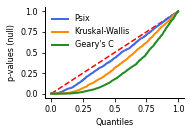

In [28]:
# pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
# neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index
pos = []
neg = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_results_1.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            pos.append('gene'+str(i+1))
        else:
        #elif ds[i] == 0:
            neg.append('gene'+str(i+1))

fig = plt.figure(figsize=(6/2.4, 4/2.4))

ax = fig.add_subplot(111)
ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))), c='red',
        linestyle='--')

ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(psix_results_1.loc[neg].pvals), label='Psix', linewidth=2, c='royalblue')

ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(kw_1.loc[neg].pvals), label='Kruskal-Wallis', linewidth=2, c='darkorange')

ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(gearyc_1.loc[neg].pvals), label="Geary's C", linewidth=2, c='forestgreen')


ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=8)
ax.set_xlabel('Quantiles', size=8)

ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=8)
ax.set_ylabel('p-values (null)', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(frameon=False, fontsize=8)

# plt.savefig('../plots/three_lineage_pvals.png', bbox_inches='tight', res=20000, dpi =2000)

In [30]:
import os 

# psix_three_lineages_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=5)
# psix_three_lineages_1.psix_results.to_csv('k_sensitivity/k_5.tab.gz', sep='\t', index=True, header=True)

# psix_three_lineages_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=10)
# psix_three_lineages_1.psix_results.to_csv('k_sensitivity/k_10.tab.gz', sep='\t', index=True, header=True)


# psix_three_lineages_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=20)
# psix_three_lineages_1.psix_results.to_csv('k_sensitivity/k_20.tab.gz', sep='\t', index=True, header=True)


# psix_three_lineages_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=30)
# psix_three_lineages_1.psix_results.to_csv('k_sensitivity/k_30.tab.gz', sep='\t', index=True, header=True)

# psix_three_lineages_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=50)
# psix_three_lineages_1.psix_results.to_csv('k_sensitivity/k_50.tab.gz', sep='\t', index=True, header=True)

# psix_three_lineages_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=100)
# psix_three_lineages_1.psix_results.to_csv('k_sensitivity/k_100.tab.gz', sep='\t', index=True, header=True)

# psix_three_lineages_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=150)
# psix_three_lineages_1.psix_results.to_csv('k_sensitivity/k_150.tab.gz', sep='\t', index=True, header=True)

# psix_three_lineages_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=200)
# psix_three_lineages_1.psix_results.to_csv('k_sensitivity/k_200.tab.gz', sep='\t', index=True, header=True)

# psix_three_lineages_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=250)
# psix_three_lineages_1.psix_results.to_csv('k_sensitivity/k_250.tab.gz', sep='\t', index=True, header=True)

# psix_three_lineages_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=300)
# psix_three_lineages_1.psix_results.to_csv('k_sensitivity/k_300.tab.gz', sep='\t', index=True, header=True)

# psix_three_lineages_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=400)
# psix_three_lineages_1.psix_results.to_csv('k_sensitivity/k_400.tab.gz', sep='\t', index=True, header=True)

# psix_three_lineages_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=500)
# psix_three_lineages_1.psix_results.to_csv('k_sensitivity/k_500.tab.gz', sep='\t', index=True, header=True)


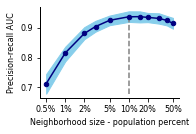

In [33]:
psix_5 = pd.read_csv('k_sensitivity/k_5.tab.gz', sep='\t', index_col=0)
psix_10 = pd.read_csv('k_sensitivity/k_10.tab.gz', sep='\t', index_col=0)
psix_20 = pd.read_csv('k_sensitivity/k_20.tab.gz', sep='\t', index_col=0)
psix_30 = pd.read_csv('k_sensitivity/k_30.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('k_sensitivity/k_50.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('k_sensitivity/k_100.tab.gz', sep='\t', index_col=0)
psix_150 = pd.read_csv('k_sensitivity/k_150.tab.gz', sep='\t', index_col=0)
psix_200 = pd.read_csv('k_sensitivity/k_200.tab.gz', sep='\t', index_col=0)
psix_300 = pd.read_csv('k_sensitivity/k_300.tab.gz', sep='\t', index_col=0)
psix_400 = pd.read_csv('k_sensitivity/k_400.tab.gz', sep='\t', index_col=0)
psix_500 = pd.read_csv('k_sensitivity/k_500.tab.gz', sep='\t', index_col=0)

pos = []
neg = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_5.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            pos.append('gene'+str(i+1))
        else:
        #elif ds[i] == 0:
            neg.append('gene'+str(i+1))

    
labels = [1]*len(pos) + [0]*len(neg)
order = list(pos) + list(neg)

    
y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])

boxplot_list = []
for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, psix_150, psix_200, psix_300, psix_400, psix_500]:
    
    box = []
    for i in range(200):
        
        pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
        neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)

        labels = [1]*len(pos_sample) + [0]*len(neg_sample)
        order = list(pos_sample) + list(neg_sample)


        y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])
        
        
        pre, rec, thres = precision_recall_curve(y_, x.loc[order].psix_score)
    
        box.append(auc(rec, pre))

    boxplot_list.append(box)

    

names = pd.Index(['gene' + str(i) for i in range(1, 5001)]) & psix_5.index

pos = []
neg = []
order = []
y = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_5.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            y.append(1)
            pos.append('gene'+str(i+1))
            order.append('gene'+str(i+1))
        else:
#         elif ds[i] == 0:
            neg.append('gene'+str(i+1))
            y.append(0)
            order.append('gene'+str(i+1))
    
    
recall_list = []
for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, psix_150, psix_200, psix_300, psix_400, psix_500]:
    pre, rec, thres = precision_recall_curve(y, x.loc[order].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

ax.fill_between(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), [np.quantile(x, 0.05) for x in boxplot_list], 
                 [np.quantile(x, 0.95) for x in boxplot_list], color='skyblue')

ax.plot([1, 1], [np.quantile(boxplot_list[0], 0.05), recall_list[5]], linestyle='--', c='gray')

ax.scatter(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), recall_list, c='navy', zorder=20)

ax.set_xticks(np.log10(np.array([0.5, 1, 2, 5, 10, 20, 50])))

ax.set_xticklabels(['0.5%', '1%', '2%', '5%', '10%', '20%', '50%'], size=8)

ax.set_xlabel('Neighborhood size - population percent', size=8)

ax.set_yticks([0.7, 0.8, 0.9])
ax.set_yticklabels(['0.7', '0.8', '0.9'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# ax.set_xlim([-0.5, 12])

# plt.show()
plt.savefig('../plots/three_lineages_kauc.png', bbox_inches='tight', res=20000, dpi =2000)


## DE vs non DE

In [5]:
from statsmodels.stats.multitest import multipletests

ATres = pd.read_csv('processed_tables/ATres.tab.gz', sep='\t', index_col=0)

idx = [int(x.split('gene')[1]) for x in psix_results_1.index]
ATres['FDR'] = multipletests(ATres.pvalue)[1]
ATres = ATres.loc[idx]
ATres['significant'] = (ATres.loc[idx].FDR < 0.05) & (ATres.loc[idx].meanLogFC >= 0.25)


In [6]:
DE = ATres.loc[ATres.significant].index
nonDE = ATres.loc[~ATres.significant].index

platonic_psi = pd.read_csv('sim_output/psi_platonic.tab.gz', sep='\t',
                          names = range(1000))
platonic_psi.index = range(1, 5001)
platonic_psi = platonic_psi.loc[np.array(idx)]

nonDS = platonic_psi.loc[
    (platonic_psi.var(axis=1) <= 10e-20) | ((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) < 0.2)].index
DS = platonic_psi.loc[
    (platonic_psi.var(axis=1) >= 10e-20) & ((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2)].index

DE_nonDS = DE.intersection(nonDS)
DE_DS = DE.intersection(DS)

nonDE_nonDS = nonDE.intersection(nonDS)
nonDE_DS = nonDE.intersection(DS)

len(DE_DS)/len(DE)

0.5717073170731707

In [7]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

platonic_psi = pd.read_csv('sim_output/psi_platonic.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)


def get_random_samples(psix_results, kw, gearyc):
    
    pos = []
    neg = []
    for i in range(5000):
        if ('gene'+str(i+1)) in psix_results.index:

            if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
                pos.append('gene'+str(i+1))
            else:
            #elif ds[i] == 0:
                neg.append('gene'+str(i+1))
                
    psix_auc = []
    kw_auc = []
    gearyc_auc = []

    for i in tqdm(range(200)):

        pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
        neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)

        labels = [1]*len(pos_sample) + [0]*len(neg_sample)
        order = list(pos_sample) + list(neg_sample)


        y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])



        pre, rec, thres = precision_recall_curve(y_, psix_results.loc[order].psix_score)
        pre_kw, rec_kw, thres_kw = precision_recall_curve(y_, kw.loc[order].KW_score)
        pre_c, rec_c, thres_c = precision_recall_curve(y_, gearyc.loc[order].C_score)

        psix_auc.append(auc(rec, pre))
        kw_auc.append(auc(rec_kw, pre_kw))
        gearyc_auc.append(auc(rec_c, pre_c))
        
    return psix_auc, kw_auc, gearyc_auc

In [154]:
psix_auc, kw_auc, gearyc_auc = get_random_samples(psix_results_1, 
                                                        kw_1, 
                                                        gearyc_1)

psix_DE_auc, kw_DE_auc, gearyc_DE_auc = get_random_samples(psix_results_1.loc[['gene'+str(x) for x in DE]], 
                                                        kw_1.loc[['gene'+str(x) for x in DE]], 
                                                        gearyc_1.loc[['gene'+str(x) for x in DE]])

psix_nonDE_auc, kw_nonDE_auc, gearyc_nonDE_auc = get_random_samples(psix_results_1.loc[['gene'+str(x) for x in nonDE]], 
                                                        kw_1.loc[['gene'+str(x) for x in nonDE]], 
                                                        gearyc_1.loc[['gene'+str(x) for x in nonDE]])


100%|██████████| 200/200 [00:30<00:00,  6.65it/s]


In [155]:
from scipy.stats import f_oneway, ranksums

In [156]:
ranksums(psix_nonDE_auc, psix_DE_auc)

RanksumsResult(statistic=10.16310254629872, pvalue=2.897078107960339e-24)

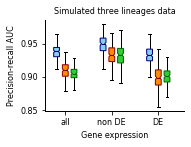

In [187]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
# gs = GridSpec(1,7)
# gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(111)
# ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_auc, psix_nonDE_auc, psix_DE_auc], positions=[1,5, 9], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_auc, kw_nonDE_auc, kw_DE_auc], positions=[1.75,5.75, 9.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_auc, gearyc_nonDE_auc, gearyc_DE_auc], positions=[2.5,6.5, 10.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 5.75, 9.75])
ax.set_xticklabels(['all', 'non DE', 'DE'], size=8)
ax.set_xlabel('Gene expression', size=8)
ax.set_title('Simulated three lineages data', size=8)

ax.set_yticks([0.85, 0.9, 0.95])
ax.set_yticklabels(['0.85', '0.90', '0.95'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim([0, 12])

plt.savefig('../plots/three_lineages_auc_DEvnonDE.png', bbox_inches='tight', res=20000, dpi =2000)
plt.show()

In [8]:
l1_pos = []
l2_pos = []
l3_pos = []
two_pos = []
ds_neg = []
for i in range(len(l3)):
    if 'gene' + str(i+1) in psix_three_lineage_1.psix_results.index:
        deltaPSI = (platonic_psi.loc['gene' + str(i+1)].max() - platonic_psi.loc['gene' + str(i+1)].min()) >= 0.2
        if ((l1[i] == 1) and (l2[i] == 0) and (l3[i] == 0) and deltaPSI):
            l1_pos.append('gene' + str(i+1))
        elif ((l1[i] == 0) and (l2[i] == 1) and (l3[i] == 0) and deltaPSI):
            l2_pos.append('gene' + str(i+1))
        elif ((l1[i] == 0) and (l2[i] == 0) and (l3[i] == 1) and deltaPSI):
            l3_pos.append('gene' + str(i+1))
#         elif ((l1[i] == 1) and (l2[i] == 1) and (l3[i] == 1) and deltaPSI):
#             all_pos.append('gene' + str(i+1))
        elif ((ds[i] == 0) or (not deltaPSI)):
            ds_neg.append('gene' + str(i+1))
        else:
            two_pos.append('gene' + str(i+1))


In [9]:
l1_pos_recall = []
l2_pos_recall = []
l3_pos_recall = []
two_pos_recall = []
ds_neg_recall = []

for i in tqdm(range(1000)):

    l1_pos_recall.append((psix_three_lineage_1.psix_results.loc[np.random.choice(l1_pos, int(len(l1_pos)*0.5), replace=False)].qvals <= 0.05).mean())
    l2_pos_recall.append((psix_three_lineage_1.psix_results.loc[np.random.choice(l2_pos, int(len(l2_pos)*0.5), replace=False)].qvals <= 0.05).mean())
    l3_pos_recall.append((psix_three_lineage_1.psix_results.loc[np.random.choice(l3_pos, int(len(l3_pos)*0.5), replace=False)].qvals <= 0.05).mean())
    two_pos_recall.append((psix_three_lineage_1.psix_results.loc[np.random.choice(two_pos, int(len(two_pos)*0.5), replace=False)].qvals <= 0.05).mean())
    ds_neg_recall.append((psix_three_lineage_1.psix_results.loc[np.random.choice(ds_neg, int(len(ds_neg)*0.5), replace=False)].qvals <= 0.05).mean())
    
    

100%|██████████| 1000/1000 [00:05<00:00, 175.12it/s]


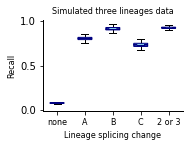

In [10]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))

ax = fig.add_subplot(111)
ax.boxplot([ds_neg_recall,
             l1_pos_recall,
             l2_pos_recall,
             l3_pos_recall,
             two_pos_recall], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['none', 'A', 'B', 'C', '2 or 3'], size=8)
ax.set_xlabel('Lineage splicing change', size=8)
ax.set_title('Simulated three lineages data', size=8)

# ax.set_yticks([0.85, 0.9, 0.95])
# ax.set_yticklabels(['0.85', '0.90', '0.95'], size=8)
ax.set_ylabel('Recall', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.01, 1.01])



# plt.savefig('../plots/three_lineages_recall_per_lineage.png', bbox_inches='tight', res=20000, dpi =2000)
plt.show()

In [ ]:
l1_pos_precision = []
l2_pos_precision = []
l3_pos_precision = []
two_pos_precision = []
ds_neg_precision = []

for i in tqdm(range(1000)):

    l1_pos_precision.append((psix_three_lineage_1.psix_results.loc[np.random.choice(l1_pos, int(len(l1_pos)*0.5), replace=False)].qvals <= 0.05))
    l2_pos_precision.append((psix_three_lineage_1.psix_results.loc[np.random.choice(l2_pos, int(len(l2_pos)*0.5), replace=False)].qvals <= 0.05))
    l3_pos_precision.append((psix_three_lineage_1.psix_results.loc[np.random.choice(l3_pos, int(len(l3_pos)*0.5), replace=False)].qvals <= 0.05))
    two_pos_precision.append((psix_three_lineage_1.psix_results.loc[np.random.choice(two_pos, int(len(two_pos)*0.5), replace=False)].qvals <= 0.05))
    ds_neg_precision.append((psix_three_lineage_1.psix_results.loc[np.random.choice(ds_neg, int(len(ds_neg)*0.5), replace=False)].qvals <= 0.05))
    
    

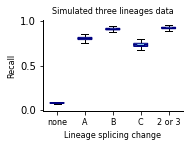

In [12]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))

ax = fig.add_subplot(111)
ax.boxplot([ds_neg_recall,
             l1_pos_recall,
             l2_pos_recall,
             l3_pos_recall,
             two_pos_recall], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['none', 'A', 'B', 'C', '2 or 3'], size=8)
ax.set_xlabel('Lineage splicing change', size=8)
ax.set_title('Simulated three lineages data', size=8)

# ax.set_yticks([0.85, 0.9, 0.95])
# ax.set_yticklabels(['0.85', '0.90', '0.95'], size=8)
ax.set_ylabel('Recall', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.01, 1.01])



plt.savefig('../plots/three_lineages_recall_per_lineage.png', bbox_inches='tight', res=20000, dpi =2000)
plt.show()

In [172]:
(psix_three_lineage_1.psix_results.loc[some_pos].qvals <= 0.05).mean()

0.9230769230769231

In [98]:
np.mean([x in all_changed for x in psix_three_lineage_1.psix_results.loc[(psix_three_lineage_1.psix_results.qvals <= 0.05)].index])

0.8894620486366986

In [73]:
np.mean([x in changed_all for x in  psix_three_lineage_1.psix_results.loc[(psix_three_lineage_1.psix_results.loc[changed_all].qvals <= 0.05).index].index])

1.0

In [96]:
all_changed

['gene1',
 'gene3',
 'gene7',
 'gene11',
 'gene12',
 'gene14',
 'gene23',
 'gene24',
 'gene27',
 'gene30',
 'gene35',
 'gene50',
 'gene52',
 'gene54',
 'gene65',
 'gene66',
 'gene67',
 'gene76',
 'gene79',
 'gene81',
 'gene82',
 'gene83',
 'gene85',
 'gene87',
 'gene92',
 'gene94',
 'gene96',
 'gene97',
 'gene103',
 'gene107',
 'gene116',
 'gene122',
 'gene126',
 'gene127',
 'gene130',
 'gene132',
 'gene138',
 'gene142',
 'gene145',
 'gene147',
 'gene157',
 'gene158',
 'gene159',
 'gene163',
 'gene165',
 'gene170',
 'gene173',
 'gene180',
 'gene183',
 'gene186',
 'gene192',
 'gene198',
 'gene200',
 'gene201',
 'gene204',
 'gene214',
 'gene223',
 'gene231',
 'gene234',
 'gene238',
 'gene241',
 'gene244',
 'gene252',
 'gene256',
 'gene258',
 'gene264',
 'gene268',
 'gene271',
 'gene273',
 'gene275',
 'gene278',
 'gene280',
 'gene281',
 'gene284',
 'gene286',
 'gene290',
 'gene304',
 'gene309',
 'gene313',
 'gene317',
 'gene321',
 'gene323',
 'gene329',
 'gene330',
 'gene334',
 'gene336',